# Fine-tuning a Sequence Classification Model Exam

In this exam, you will be tasked with performing dataset preprocessing and fine-tuning a model for sequence classification. Complete each step carefully according to the instructions provided.

### Model and Dataset Information

For this task, you will be working with the following:

- **Model Checkpoint**: Use the pre-trained model checkpoint `aubmindlab/bert-base-arabertv02` for both the model and tokenizer.
- **Dataset**: You will be using the `CUTD/sanad_df` dataset. Ensure to load and preprocess the dataset correctly for training and evaluation.

**Note:**
- Any additional steps or methods you include that improve or enhance the results will be rewarded with bonus points if they are justified.
- The steps outlined here are suggestions. You are free to implement alternative methods or approaches to achieve the task, as long as you explain the reasoning and the process at the bottom of the notebook.
- You can use either TensorFlow or PyTorch for this task. If you prefer TensorFlow, feel free to use it when working with Hugging Face Transformers.
- The number of data samples you choose to work with is flexible. However, if you select a very low number of samples and the training time is too short, this could affect the evaluation of your work.

## Step 1: Load the Dataset

Load the dataset and split it into training and test sets. Use 20% of the data for testing.

In [ ]:
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("CUTD/sanad_df")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sanad_df.csv:   0%|          | 0.00/50.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15000 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'text', 'label'],
        num_rows: 15000
    })
})

In [ ]:
ds = ds["train"]

In [ ]:
ds

Dataset({
    features: ['Unnamed: 0', 'text', 'label'],
    num_rows: 15000
})

## Step 2: Clean Unnecessary Columns

Remove any columns from the dataset that are not needed for training.

In [ ]:
ds = ds.remove_columns(['Unnamed: 0'])

## Step 3: Splitting the Dataset

Split the dataset into training and testing sets, ensuring that 20% of the data is used for testing.

In [ ]:
dataset = ds.train_test_split(test_size=0.2)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 12000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3000
    })
})


## Step 4: Tokenizing the Data

Initialize a tokenizer for the model.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02") #AraBERT, Pre-training BERT for Arabic Language Understanding

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
print(tokenized_dataset)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
})


## Step 5: Preprocessing the Text

Map the tokenization function to the dataset. Ensure the text data is processed using truncation to handle sequences that exceed the model's input size. Please do any further preprocessing.

**Bonus**: If you performed more comprehensive preprocessing, such as removing links, converting text to lowercase, or applying additional preprocessing techniques.

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')

all_words = ' '.join(ds['text']).split()

word_freq = Counter(all_words)

common_words = word_freq.most_common(20)
common_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('في', 152026),
 ('من', 113885),
 ('على', 63188),
 ('إلى', 50208),
 ('درهم', 41630),
 ('.', 33755),
 ('أن', 31462),
 ('مليون', 31062),
 ('التي', 30961),
 ('بنسبة', 25279),
 ('عن', 23106),
 ('سهم', 22457),
 ('خلال', 21746),
 ('درهم،', 18658),
 ('الذي', 18255),
 ('ما', 17225),
 ('حيث', 17169),
 ('مع', 16603),
 ('بقيمة', 16163),
 ('دبي', 14997)]

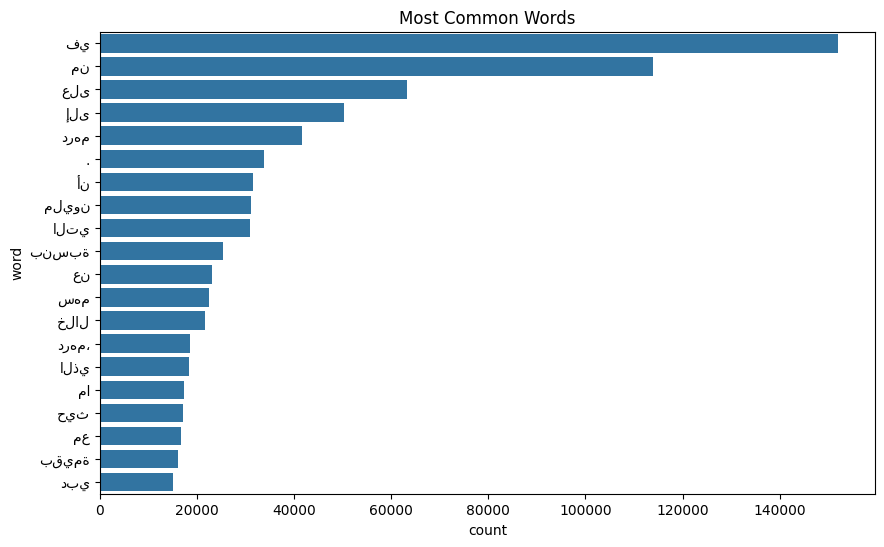

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
common_words_data = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=common_words_data)
plt.title('Most Common Words')
plt.show()

In [ ]:
import re

def preprocess_text(text):
    # Arabic stopwords list
    arabic_stopwords = [
        "في", "من", "على", "أن", "التي", "عن", "الذي", "إلى", "حيث", "مع", "ما"
    ]

    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove hash symbol
    text = re.sub(r'[#]', '', text)
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_function(examples):
    # Apply the cleaning function to all texts
    examples['text'] = [preprocess_text(text) for text in examples['text']]
    return examples

# Apply the function to the dataset
processed_dataset = tokenized_dataset.map(preprocess_function, batched=True)

print(processed_dataset['train'][6]['text'])

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

في اطار مهرجان الفنون الاسلامية فلك الفسيفساء القى علي ندا الدوري مدير مركز الشارقة لفن الخط العربي والزخرفة محاضرة في مقر المركز بعنوان التشكيل والتزيين في الخط العربي ركز فيها على قواعد كتابة الحرف وضرورة ان تتوفر في الخطاط قدرة لغوية ونحوية وثقافية تحيط بكل فنون اللغة العربية حتى يتسنى له ان يكون خطاطا ماهرا ذلك لأن كتابة الخط من دون مراعاة مثل هذه القواعد الاساسية في كتابته يعني ان الكتابة ستكون ناقصة ومشوهةفرق الدوري بين مصطلحي التشكيل والتزيين موضحا ان التشكيل يدخل في اصل الكلمة وهذا يتطلب الالمام بقواعد اللغة ومعرفة مواقع الفتحة والضمة والشدة وايضا همزة الوصل وهمزة القطع الخأما ما يتعلق بالتزيين فأوضح الدوري أنه تلك الاشكال الزخرفية والحروف الصغيرة توضع فوق او تحت الحروف الكبيرة او الاصلية لتكسب الخط جمالية لا بد منهاوعدد الدوري انواع الخطوط التي تحتاج الى التشكيل والتزيين وتشمل خط الثلث والنسخ والاجازة وهو خليط من النسخ والثلث وايضا الخط الجلي الديوانيوفي سياق ابدائه لبعض الملاحظات العامة قال الدوري ان المصحف كتب بخط النسخ بنسبة تصل الى في المائة من اجزائه وان القليل منه كتب بخ

### Step 6: Label Encoding

Convert the categorical labels into numerical format using a label encoder if needed.

In [ ]:
train_dataset = tokenized_dataset['train']
test_dataset = tokenized_dataset['test']

{'text': ['أبوظبي: «الخليج»تراجع مؤشر سوق أبوظبي للأوراق المالية هامشياً بنسبة 0.06% عند مستوى 4587.67 نقطة، مع تراجع أسهم شركات العقار والاتصالات والطاقة والصناعة. شهد السوق تداول 104.87 مليون سهم، بقيمة إجمالية بلغت 159.62 مليون درهم، نفذت من خلال 1703 صفقات، وتم تداول أسهم 26 شركة، وارتفعت أسعار أسهم 8 شركات، بينما تراجعت أسعار أسهم 10 شركات.وتصدر سهم أسماك التداولات بقيمة 34.67 مليون درهم، وارتفع 6.53%، مغلقاً عند 2.12 درهم، تلاه سهم إشراق بتداولات بقيمة 21.9 مليون درهم، وهبط 1.89%، مغلقاً عند 1.04 درهم، ثم سهم ميثاق بتداولات قيمتها 15.57 مليون درهم، وانخفض 2.97%، ليغلق عند 0.98 درهم.وبشأن الأسهم الأكثر ارتفاعاً، جاء في المركز الأول سهم الوثبة للتأمين الذي لامس الحد الأعلى بنسبة 14.43%، وأغلق عند 11.1 درهم، تلاه سهم الخزنة للتأمين، وزاد 9.3%، وأغلق عند 0.47 درهم، ثم سهم أسماك، بارتفاع نسبته 6.53%، وأغلق عند 2.12 درهم.في المقابل، سجل سهم أبوظبي الوطنية للتكافل الانخفاض الأكثر، وهبط 5.8%، مغلقاً عند 4 دراهم، وجاء ثانياً سهم رأس الخيمة العقارية، الذي هبط 2.99%، وأغلق عند 0.65 درهم، ثم

In [ ]:
train_dataset = tokenized_dataset["train"].shuffle(seed=42).select(range(100))
test_dataset = tokenized_dataset["test"].shuffle(seed=42).select(range(100))

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_dataset['label'])
train_dataset = tokenized_dataset.map(lambda examples: {'label': label_encoder.transform([examples['label']])[0]})
test_dataset = tokenized_dataset.map(lambda examples: {'label': label_encoder.transform([examples['label']])[0]})

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

### Step 7: Data Collation for Padding

Prepare the data for training by ensuring all sequences in a batch are padded to the same length. Use a data collator to handle dynamic padding.

In [ ]:
# from torch.utils.data import DataLoader



# train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=8)
# test_dataloader = DataLoader(test_dataset, batch_size=8)

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

### Step 8: Model Initialization

Initialize a sequence classification model using the BERT-based architecture.

*   List item
*   List item

Set the the right amount of output labels.

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02",num_labels=3)

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Step 9: Training Arguments

Define the training arguments, including parameters such as learning rate, batch size, number of epochs, and weight decay.

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=3,

)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


## Step 10: Trainer Initialization and Training

Set up the trainer with the model, training arguments, dataset, tokenizer, and data collator. Train the model using the dataset you processed earlier.

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [ ]:
#Print the accuaracy
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset['train'],
    eval_dataset=test_dataset['test']
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,0.012100,0.027392


## Step 11: Inference

Once the model is trained, perform inference on a sample text to evaluate the model's prediction capabilities. Use the tokenizer to process the text, and then feed it into the model to get the predicted label.

In [ ]:
#Import the torch module
import torch

sample_text = 'هذا المثال تجربة للتنبؤ اليوم الخميس في معسكر تقنيات إدارة الزحام بإدارة فريق مكون من ثلاثة أشخاص رانيه و مريم و رهف'

# Tokenize the sample text
inputs = tokenizer(sample_text, truncation=True, padding=True, return_tensors="pt")

# Move inputs to the GPU
inputs = inputs.to('cuda') # Move the input tensors to the GPU

# Make the prediction
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get the predicted label
predicted_label = torch.argmax(logits, dim=1).item()

# Print the predicted label
print(f"Predicted Label: {predicted_label}")

# Sources

https://huggingface.co/docs/transformers/en/training

- Raniyah ALghamdi

- Rahaf Alzahrani

- Maryam